In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
user_data = pd.read_csv('3_user_data.csv')

In [122]:
logs = pd.read_csv('3_logs.csv')

In [123]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [124]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [125]:
logs.platform.nunique()

3

In [126]:
success = logs.query('success == True')
success

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [127]:
success_count = success.groupby('client', as_index=False)  \
.agg({'success': 'count'})  \
.sort_values(['success', 'client'], ascending=[False, True])  \


In [128]:
success_count

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


In [129]:
platform_count = succes.groupby('platform')  \
    .agg({'platform': 'count'})  \
    .rename(columns={'platform': 'count'})  \
    .reset_index()  \
    .sort_values('count', ascending=False)

In [130]:
platform_count

,platform,count
1,phone,2019
0,computer,1090
2,tablet,180


In [136]:
users_data = user_data.merge(logs, on='client')
users_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [137]:
users_data.query('premium == True').value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

In [148]:
premium = users_data.query('premium == True')

In [149]:
based = users_data.query('premium == False')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


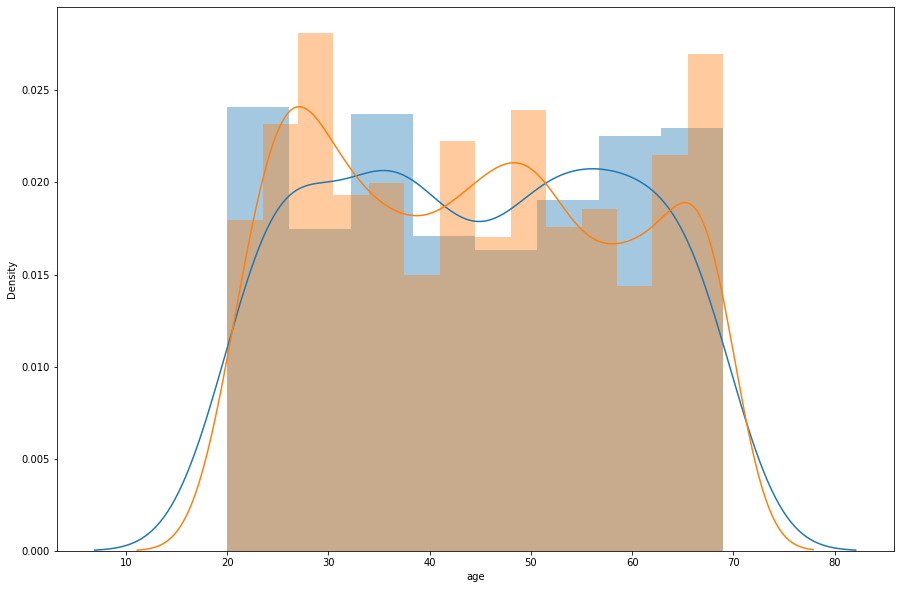

In [173]:
plt.figure(figsize=(15, 10))
sns.distplot(based.age)
sns.distplot(premium.age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


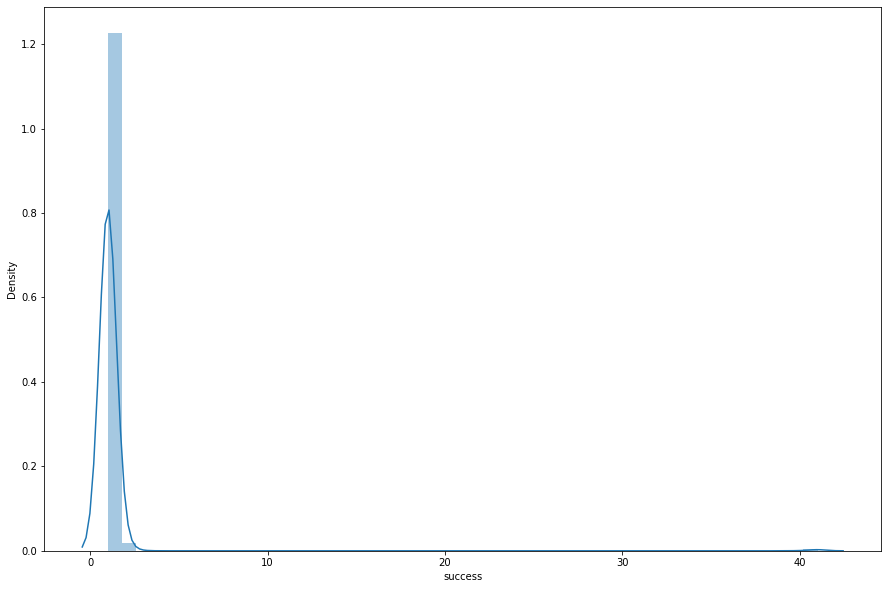

In [172]:
plt.figure(figsize=(15, 10))
sns.distplot(success_count.success)

In [161]:
pc = users_data.query("platform == 'computer'")

In [162]:
pc

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
23,74867,True,27,False,computer,1585452086
...,...,...,...,...,...,...
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079
3430,61851,False,31,True,computer,1585473042


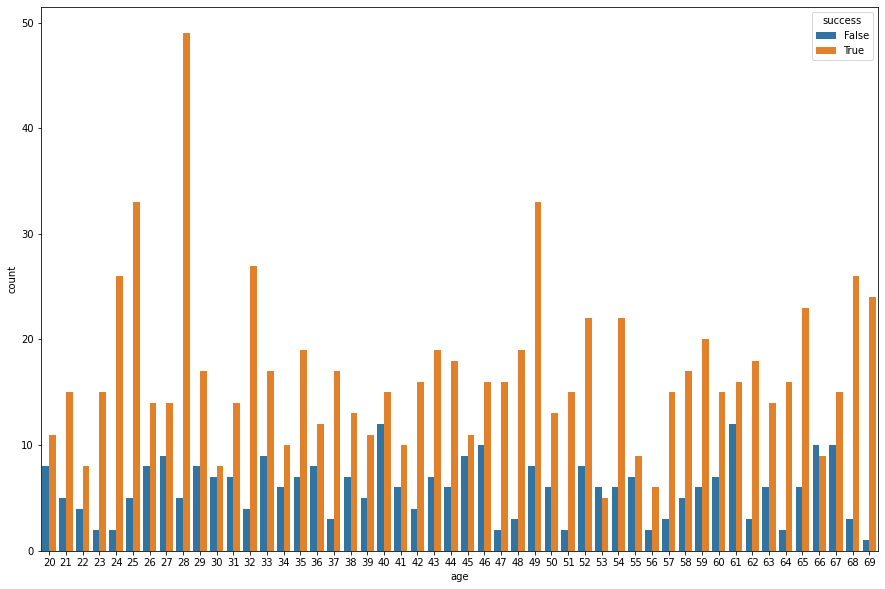

In [171]:
plt.figure(figsize=(15, 10))
sns.countplot(data=pc, x="age", hue="success")